# Data Science Jobs Analyze


Group:
* Anchal
* Angela
* Larissa
* Fabio
* Felipe

This program extracts data from Indeed.ca website to analyze main caracteristics 
of Data Science Job opportunities in Toronto

In [1]:
# Importing Libraries 
import numpy as np
import pandas as pd
import re 
import requests
import datetime
from bs4 import BeautifulSoup

In [2]:
# Defining some search Arguments
input_job = "Data Scientist"
# Add quotation marks("") to your input_job
input_quote = False 
# leave empty if input_city is not specified
input_city = "" 
input_state = "Canada"
sign = "+"
#'http://www.indeed.com'
BASE_URL_indeed =  'https://ca.indeed.com/' 


In [3]:
# Functions
# Function for Transform searching keywords 
def transform(input,sign, quote = False):
    syntax = input.replace(" ", sign)
    if quote == True:
        syntax = ''.join(['"', syntax, '"'])
    return(syntax)

# Funtion to verify a specific Skill(KeyWord) int the Job Requirement attribute ("big String")        
def find_skill(skill, jobReq ):
    if skill in jobReq:
        return True
    else:
        return False

# Function to clean text before scraping  
def text_cleaner(dirty_text):
    text = dirty_text
    # Break into lines
    lines = (line.strip() for line in text.splitlines())
    # Break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  ")) 
    # Get rid of all blank lines and ends of line
    text = ''.join(chunk for chunk in chunks if chunk).encode('utf-8') 
    # Now clean out all of the unicode junk (this line works great!!!)
    try:
        # Need this as some websites aren't formatted in a way that this works, can occasionally throw an exception
        text = text.decode('unicode_escape').encode('ascii', 'ignore') 
    except:                                                             
        return                                                         
   
    text = text.decode('utf-8')
    # Now get rid of any terms that aren't words (include 3 for d3.js), also include + for C++
    text = re.sub("[^a-zA-Z+3]"," ", text)  
    # Fix spacing issue from merged words                                         
    text = re.sub(r"([a-z])([A-Z])", r"\1 \2", text) 
    # Go to lower case and split them apart
    text = text.lower().split()  
    text = list(set(text)) 
    return text

# Web Scraping Attributes
# Scraping the Salary
def Salary(soup):
    try:
        Source = soup.find( attrs = {'class' : 'jobsearch-JobMetadataHeader-item'}).text
        Souce_first_letter = Source[0:1]
        if Souce_first_letter == '$':
            Salary = Source
            return Salary
        else:
            Salary = 'Not Informed'
            return Salary
    except:
        Salary = 'Not Informed'
        return Salary

# Scraping the Job Type    
def Job_Type(soup):
    try:
        Source = soup.find( attrs = {'class' : 'jobsearch-JobMetadataHeader-item'}).text
        Souce_first_letter = Source[0:1]
        if Souce_first_letter != '$':
            Job_Type = Source
            return Job_Type
        else:
            Job_Type = 'Not Informed'
            return Job_Type
    except:
        Job_Type = 'Not Informed'
        return Job_Type

# Scraping the City    
def City(soup):
    try:
        Position = soup.find( attrs = {'class' : 'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'})
        Title_count = len(Position.text)
        Location_2 = soup.find('title')
        Final = Location_2.text.find('Indeed')
        City = Location_2.text[Title_count+3: Final-3].split(',')[0]
        return City
    except:
        City = 'Not Informed'
        return City

# Scraping the Province    
def Province(soup):
    try:
        Position = soup.find( attrs = {'class' : 'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'})
        Title_count = len(Position.text)
        Location_2 = soup.find('title')
        Final = Location_2.text.find('Indeed')
        Province = Location_2.text[Title_count+3: Final-3].split(', ')[1]
        return Province
    except:
        Province = 'Not Informed'
        return Province
    
# Scraping the Position    
def Position(soup):
    try:
        position_1 = soup_html.find(attrs = {'class' : 'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'})
        Position = position_1.text
        return Position
    except:
        Position = 'Not Informed'
        return Position
        
# Scraping the Job Requirement    
def Job_requirements (soup):
    try:
        General_1 = soup.find( attrs = {'class' : 'jobsearch-JobComponent-description icl-u-xs-mt--md'})
        General = General_1.text
        return General
    except:
        General = 'Not Informed' 
        return General

# Scraping the Company Name    
def Company_Name(soup):
    try:
        Company_Name_1 = soup.find( attrs = {'class' : 'icl-u-lg-mr--sm icl-u-xs-mr--xs'})
        Company_name = Company_Name_1.text
        return Company_name
    except:
        Company_name = 'Not Informed'
        return Company_name       


In [4]:
# Generating Base Indeed URL
url_indeed_list = [ BASE_URL_indeed, '/jobs?q=', transform(input_job, sign, input_quote), '&l=', input_state]
url_indeed = ''.join(url_indeed_list)

In [5]:
# Get the HTML code from the URL
rawcode_indeed = requests.get(url_indeed)
# Choose "lxml" as parser
soup_indeed = BeautifulSoup(rawcode_indeed.text, "lxml")

In [6]:
# Total number of results
num_total_indeed = soup_indeed.find(id = 'searchCount').contents[0].split()[-2]
# Remove non-numeric characters in the string
num_total_indeed = re.sub("[^0-9]","", num_total_indeed) 
num_total_indeed = int(num_total_indeed)
# Total number of pages
num_pages_indeed = int(np.ceil(num_total_indeed/11.0))
# Current date
now = datetime.datetime.now()
now_str = now.strftime("%m/%d/%Y")
now_str_name=now.strftime('%m%d%Y')

In [7]:
# Looping all pages
# num_pages_indeed = 5
# create an empty dataframe
df_base = pd.DataFrame()
for i in range(1, num_pages_indeed+1):
    # Generating the URL
    url = ''.join([url_indeed, '&start=', str(i*10)])
    # Getting the LXML
    rawcode = requests.get(url)
    soup_lxml = BeautifulSoup(rawcode.text, "lxml")
    # Pick out all the "div" with "class="job-row"
    divs = soup_lxml.findAll("div")
    job_divs = [jp for jp in divs if not jp.get('class') is None
                    and 'row' in jp.get('class')]
    # Looping all jobs for a specific page
    for job in job_divs:
        try:
            # Attribute IX
            ix = job.index
            # Attribute Job Id
            id = job.get('data-jk', None)
            # Attribute Link related to job id
            link = BASE_URL_indeed + '/viewjob'+ '?jk=' + id
            # Parsing the HTML
            r = requests.get(link)
            soup_html = BeautifulSoup(r.text, "html.parser")
            # Attribute Job Requirement
            jobrequirements = Job_requirements(soup_html)
            # Attribute Company Name 
            company = Company_Name(soup_html)           
            # Atribute City
            city = City(soup_html)
            # Atribute Province
            province = Province(soup_html)
            # Atribute Salary
            salary = Salary(soup_html)
            # Attribute Job Type
            jobtype = Job_Type(soup_html)
            # Attribute Position
            position = Position(soup_html)
        except:
            continue
        # Populating the base data frame    
        df_base = df_base.append({'ix': ix,
                                  'Job_ID': id,
                                  'JobTitle': input_job,
                                  'JobType':jobtype,
                                  'CompanyName': company,
                                  'Salary' : salary,
                                  'Position':position,
                                  'City': city,
                                  'Province': province,
                                  'JobRequirements': jobrequirements,
                                  'Date': now_str,
                                  'From':"Indeed",
                                  'JobLink':'link'},ignore_index=True)

In [8]:
# Correlating information from the base data frame and keyword table
# Reading the data sources skill and kewWord
skill_source = pd.read_excel('ds.xlsx', sheet_name='skill')
kw = pd.read_excel('ds_kw.xlsx')
# Defining a auxiliary data frame skill
df_skill_aux = pd.DataFrame(columns=['Job_ID', 'KeyWord', 'Skill_ID'])
# Lopping into the base data frame and checking all KeyWords related to the job requiremnt attribute ("Big String")
z = 0
for index, row in df_base.iterrows():
    k = kw.loc[kw.JobTitle == row["JobTitle"], ['KeyWord', 'Skill_ID']]
    jobReq = row["JobRequirements"]
    job_ID = row["Job_ID"]
    for idx, skills in k.iterrows():
        skill = ' ' + skills["KeyWord"]
        skill_ID = skills["Skill_ID"]
        func = find_skill(skill, jobReq)
        if func:
            df_skill_aux.loc[z] = [job_ID, skill, skill_ID]
            z += 1

In [9]:
# Transforming and Cleaning the df_tmp to prepare the main data frame.

# Creating df_tmp
df_tmp = pd.DataFrame()
# Merging the Base Data Frame and Skill table
df_tmp = df_base.merge(df_skill_aux, how='left', left_on='Job_ID', right_on='Job_ID')
# Treating null values
values = {'Skill_ID': '-1', 'KeyWord': "Not found"}
df_tmp = df_tmp.fillna(value=values)
# Defing the Skill Id attribute as an Tnteger type
df_tmp['Skill_ID'] = df_tmp['Skill_ID'].astype(int)
# Dropping the Job Requirements colum. This column will not be used for analysis
df_tmp.drop(columns=['JobRequirements'])
# Preparing the main data frame: Meging the df_tmp and skill source table
df_jobs = df_tmp.merge(skill_source, left_on='Skill_ID', right_on='Skill_ID', how='left')
# Removing duplicated rows from the main data frame
df_jobs = df_jobs.drop_duplicates(subset={'Job_ID','Skill_ID'}, keep='first', inplace=False)
# Resetting the data frame index
df_jobs = df_jobs.reset_index(drop=True)
df_jobs = df_jobs[['Province', 'City', 'Job_ID', 'JobTitle_x', 'Position',  'CompanyName', 'JobType', 'Salary', 'KeyWord', 'Skill', 'Category']]
# df_jobs.head()

In [31]:
# Starting the Analysis

# Checking how many records we are missing:
df_jobs.isnull().sum()

Province       0
City           0
Job_ID         0
JobTitle_x     0
Position       0
CompanyName    0
JobType        0
Salary         0
KeyWord        0
Skill          0
Category       0
dtype: int64

In [32]:
# looking at the descriptive statistics for the dataframe:
df_jobs.describe(include='all')

,Province,City,Job_ID,JobTitle_x,Position,CompanyName,JobType,Salary,KeyWord,Skill,Category
count,4051,4051,4051,4051,4051,4051,4051,4051,4051,4051,4051
unique,13,105,972,1,820,528,12,74,58,48,6
top,ON,Toronto,44a24c7527009998,Data Scientist,Data Scientist,STEMCELL Technologies,Not Informed,Not Informed,R,R,Hard
freq,1961,1301,20,4051,302,117,3449,3779,772,772,2778


In [111]:
# Provinces by Job
Jobs_Province = pd.crosstab(df_jobs['Province'],df_jobs['JobTitle_x'])
Jobs_Province = Jobs_Province.sort_values('Data Scientist',ascending=False)
Jobs_Province

JobTitle_x,Data Scientist
Province,
ON,1961
QC,782
BC,773
AB,293
Not Informed,126
NS,38
SK,38
NB,16
MB,14


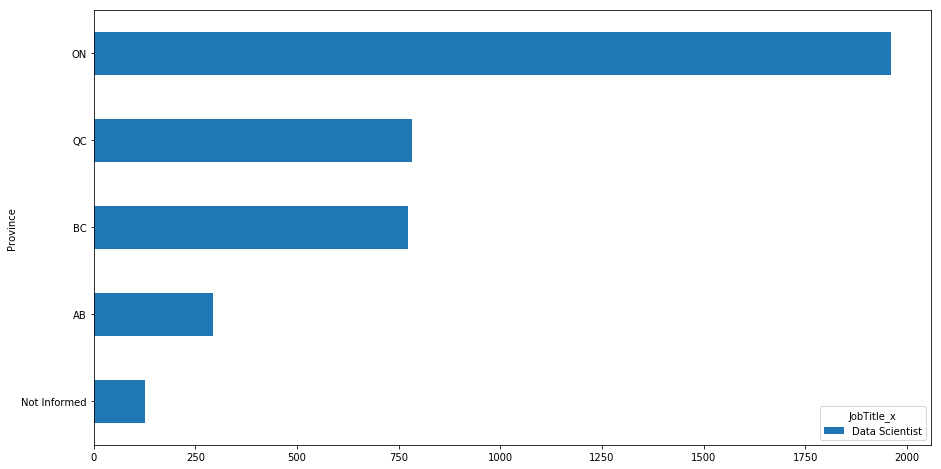

In [148]:
# Plotting the Provinces by Job

Jobs_Province_Plot = Jobs_Province.head(5)
Jobs_Province_Plot = Jobs_Province_Plot.sort_values('Data Scientist',ascending=True)
# Jobs_Province_Plot.plot(kind='barh', figsize=(10, 7))
Jobs_Province_Plot.plot(kind='barh', stacked=False, rot = 0, figsize=(15, 8));

In [117]:
# Skills by Job
Skills_Job = pd.crosstab(df_jobs['Skill'],df_jobs['JobTitle_x'])
Skills_Job = Skills_Job.sort_values('Data Scientist',ascending=False)
Skills_Job = Skills_Job.head(10)
Skills_Job

JobTitle_x,Data Scientist
Skill,
R,772
Python,339
Computer Science,212
PhD,205
SQL,203
Java,173
Bachelor,169
Machine Learning,148
Excel,147


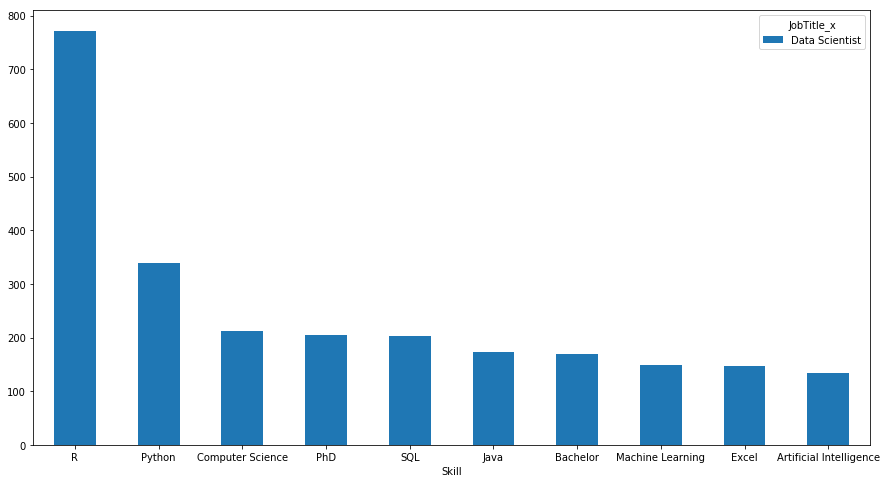

In [128]:
# Plotting the Skill by Job

Skills_Job_Plot = Skills_Job
Skills_Job_Plot.plot(kind='bar', stacked=False, rot = 0, figsize=(15, 8));

In [10]:
# Exporting files
df_base.to_excel('out.xlsx')
df_jobs.to_excel('final_out.xlsx')

In [16]:
# Exporting the df_jobs to Sqlite DB (jobs table) 

# import sqlite3
# sqlite_file = '/Users/fabio.maia/Downloads/chinook/chinook.db'
# conn = sqlite3.connect(sqlite_file)
# df = df_jobs[['Province', 'City', 'Job_ID', 'JobTitle_x', 'Position',  'CompanyName', 'JobType', 'Salary', 'KeyWord', 'Skill', 'Category']]
# df.to_sql("jobs", conn, if_exists='replace')
# conn.close()